**Introduction**

For a marketing campaign, the companies are interested in seeing how much of the success could be attributed to the ads. With that in mind, an A/B test is done where the experimental group (the majority of people) will be exposed to ads and a small portion of people (the control group) would instead see a Public Service Announcement (PSA) or nothing in the exact size and place the ad would normally be. 

We analyze the groups and find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant. 

**Data Dictionary**

- **index**: Row Index  
- **User ID**: User ID (unique)  
- **Test group**: If 'ad', the person saw the advertisement; if 'PSA', they only saw the public service announcement.  
- **converted**: If a person bought the product, then True; otherwise, False  
- **total ads**: Amount of ads seen by a person  
- **most ads day**: Day the person saw the most ads  
- **most ads hour**: Hour of the day the person saw the most ads  


**Importing the necessary libraries**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings. filterwarnings('ignore')

**Exploratory Data Analysis**

In [18]:
#Reading the data

df = pd.read_csv('marketing_AB.csv')

#Checking the head of the data

df.head(5)

#Checking for duplicate user ids: unique identifier

''' Checks for duplicate values in the user id column of the dataframe, returns a boolean series 
where each value is True if a row is a duplicate based on the user id column, and False otherwise. The first occurrence of the user 
id is market False, and subsequent occurrences are marked as True. sum() sums up the True values'''

df.duplicated(subset = "user id").sum() 

#Dropping the unwanted columns, Unnamed:0 and user id as user id alone would not be a predictor of anything alone

df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

df.columns

#Creating a dataframe with the categorical variables 

df_cat = df[['test group', 'converted', 'most ads day','most ads hour']]
df_cat.nunique() #checking unique categories for each of the features

#Assessing the unique categories for each column:checking if levels are appropriately defined

for i in df_cat.columns:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


**Univariate Analysis and Visualization**

Picking each variable one at a time and visualizing it. Choosing the customizations as deemed appropriate for the variables. 



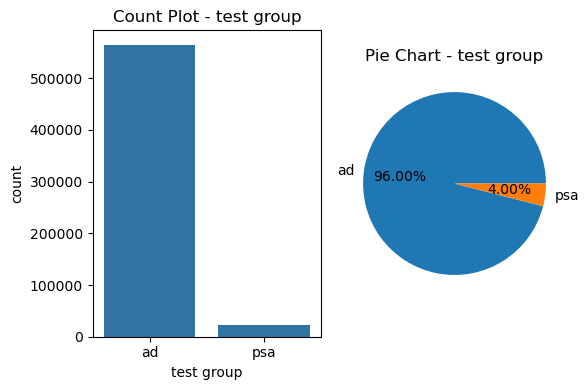

In [21]:
#Plotting the test groups

# creating an object and passing up a feature, creating 2 visualizations for each categorical variable

variable = 'test group' 
plt.figure(figsize = (6,4))

#Creating a count plot

plt.subplot(1,2,1)
sns.countplot(x=variable, data = df_cat)
plt.title(f'Count Plot - {variable}')

#Creating a pie chart

plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts() #calculates the frequency of each unique value in the categorical column
#value_counts() returns an series where the index is the unique values and the corresponding values are their counts(frequencies)

plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()


96% of people were shown the ad and 4% of people were shown the Public Service Announcement. 

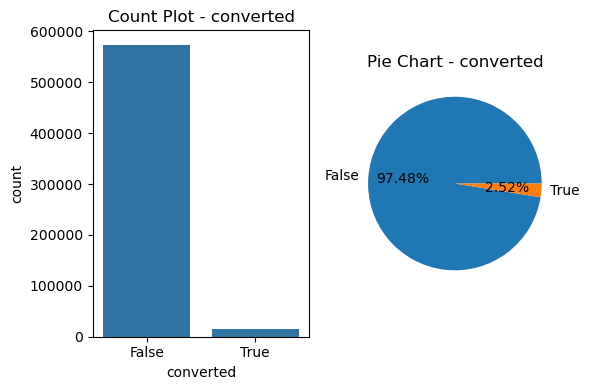

In [22]:
#Exploring the conversions

variable = 'converted' 
plt.figure(figsize = (6,4))

#Creating a count plot

plt.subplot(1,2,1)
sns.countplot(x=variable, data = df_cat)
plt.title(f'Count Plot - {variable}')

#Creating a pie chart

plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts() #calculates the frequency of each unique value in the categorical column
#value_counts() returns an series where the index is the unique values and the corresponding values are their counts(frequencies)

plt.pie(counts, labels = counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()
plt.show()


There was only 2.5% conversion. 